In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywedge as pw
from sklearn.preprocessing import FunctionTransformer

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load the train data
df = pd.read_csv('train_AvX1lTZ.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [7]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [8]:
# Separating categorical & numerical columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
num_cols = ['age', 'avg_glucose_level', 'bmi']
target_col = ['stroke']

# Univariate Categorical Analysis

In [11]:
def Uni_categorical(data):
    plt.figure(figsize=(15,15))
    number=1

    for col in data[['gender','hypertension','heart_disease', 'ever_married', 'work_type',
                    'Residence_type', 'smoking_status']]:
        if number<8:
            ax=plt.subplot(4,2,number)
            sns.countplot(x=data[col])
            plt.xlabel(col)
            number+=1
        
    plt.show()

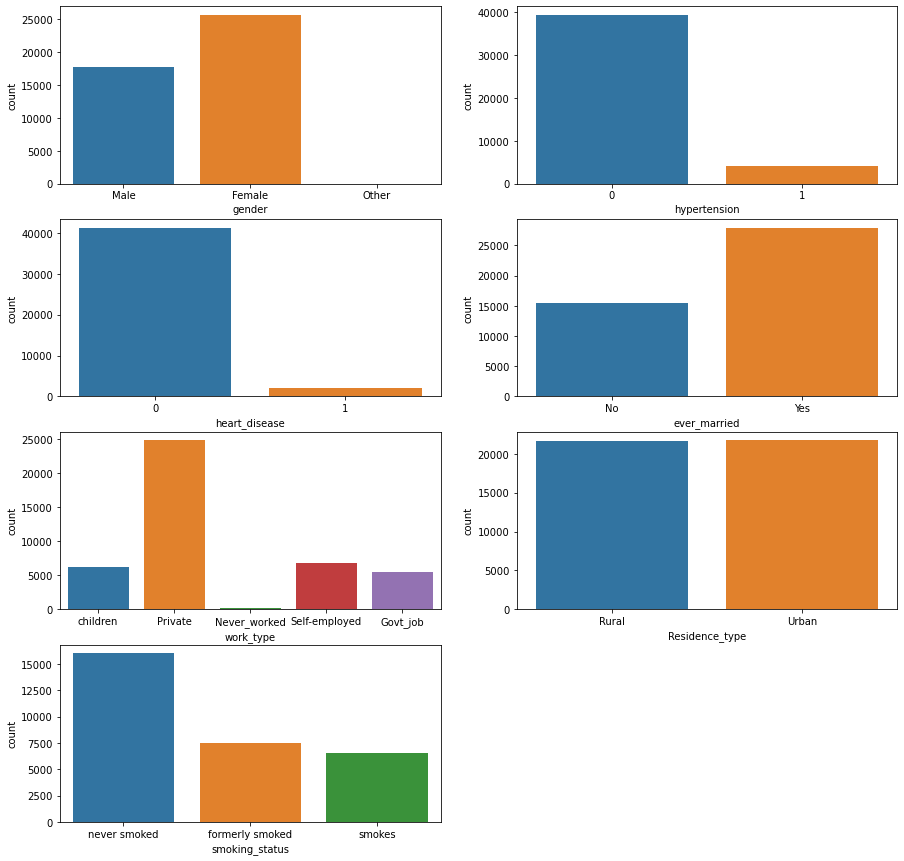

In [12]:
Uni_categorical(df)

Univariate Categorical observations:
1. Population breakup by gender: 
    Female - 59%, Male - 40.8%, Other - 0.02%
2. Ever_married
    Yes - 64.4%, No - 35.6%
3. Work_type
    57% falls under Private
    children/Govt_job/Self-employed - contribute around 14% on an average
    Never_worked - negligible (0.41%)
4. Residence_type
    Split equally between Rural (49.9%) & Urban (50.1%)
5. Smoking_status
    Never_smoked - 37%
    formerly smoked/smokes - around 16% avg
    blank - 30.6% (if imputed with mode value, never_smoked will be 67.6%)
6. Hypertension
    Yes - 9.4%
    No - 90.6%
7. Heart_disease
    Yes - 4.75%
    No - 95.25%

# Univariate Numerical Analysis

In [266]:
def Uni_numerical(df, num_cols):
    plt.figure(figsize=(15,15))
    number=1
    
    for col in num_cols:
        plt.figure(figsize=(6,3))
#         sns.histplot(data[col], bins=10)
        sns.kdeplot(x=data[col], shade=True)
        
        plt.show()

<Figure size 1080x1080 with 0 Axes>

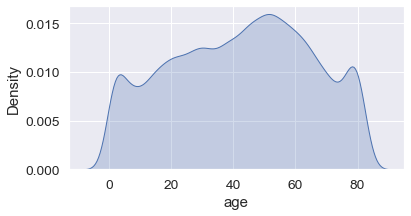

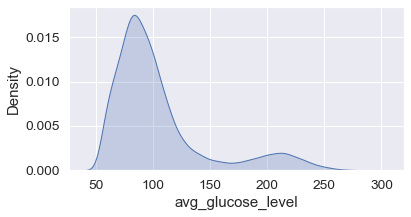

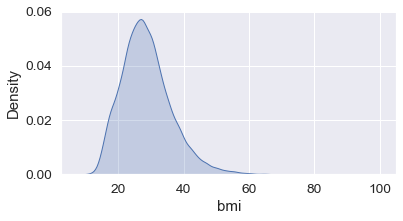

In [267]:
Uni_numerical(df, num_cols)

In [18]:
df['age'].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [20]:
df['avg_glucose_level'].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

In [21]:
df['bmi'].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

In [285]:
#create the function transformer object with Logarithm transformation 
logarithm_transfer = FunctionTransformer(np.log, validate = True)

columns = ['avg_glucose_level','bmi']

#Apply the transformation
data_new = logarithm_transfer.transform(df[columns])
data = pd.DataFrame(data_new, columns=columns)
df['avg_glucose_level'] = data['avg_glucose_level']
df['bmi'] = data['bmi']
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_group,bmi_status,diabetic,Male,Other,Yes,Urban,never smoked,smokes,Never_worked,Private,Self-employed,children
0,30669,3.0,0,0,1.516256,1.061385,0,1,3,1,1,0,0,0,1,0,0,0,0,1
1,30468,58.0,1,0,1.498927,1.299831,0,2,1,1,1,0,1,1,1,0,0,1,0,0
2,16523,8.0,0,0,1.549378,1.053580,0,1,3,1,0,0,0,1,1,0,0,1,0,0
3,56543,70.0,0,0,1.443309,1.275569,0,2,1,1,0,0,1,0,0,0,0,1,0,0
4,46136,14.0,0,0,1.625930,1.081700,0,4,0,2,1,0,0,0,1,0,1,0,0,0


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

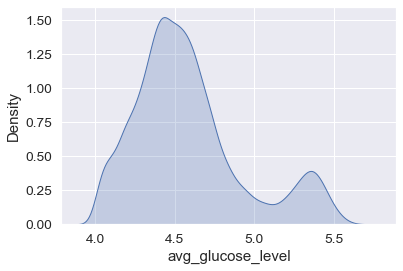

In [283]:
sns.kdeplot(x=df['avg_glucose_level'], shade=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

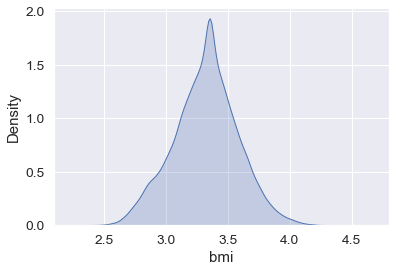

In [284]:
sns.kdeplot(x=df['bmi'], shade=True)

# Target Variable

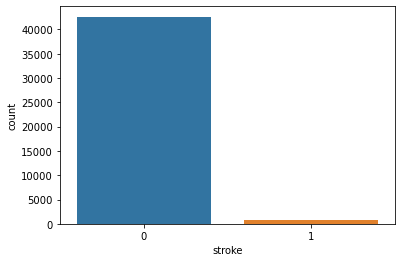

In [231]:
plt.figure(figsize=(6,4));
sns.countplot(x=data.stroke);
plt.show()

<AxesSubplot:>

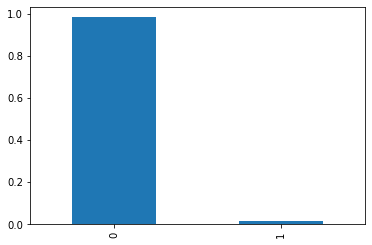

In [232]:
df.stroke.value_counts(normalize=True).plot.bar()

Target variable observations (Stroke):
- Heavily imbalanced
    No - 98%
    Yes - 2%


# Bivariate Analysis

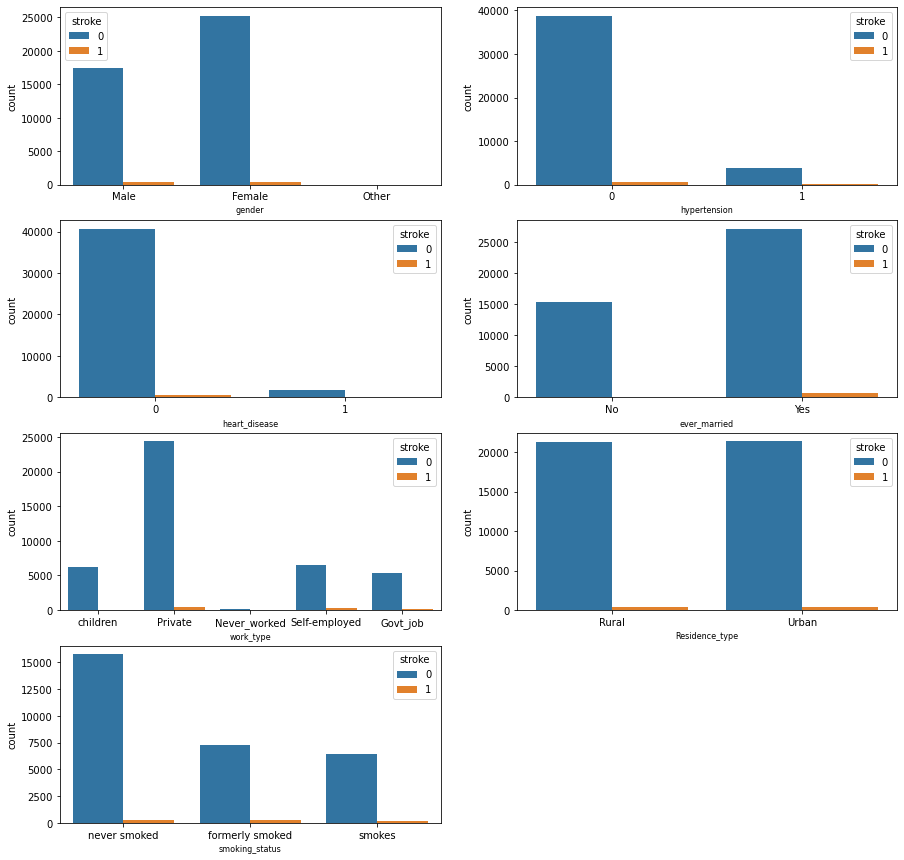

In [233]:
plt.figure(figsize=(15,15))
number=1
#da.astype(int, object)
for column in data[['gender','hypertension','heart_disease', 'ever_married', 'work_type',
                    'Residence_type', 'smoking_status']]:
    if number<8:
        ax=plt.subplot(4,2,number)
        sns.countplot(column,hue=data.stroke,data=data)
        plt.xlabel(column,fontsize=8)
        number+=1
plt.show()

Observations:
1. Gender-Stroke
	Even though population of Female is more, the percentage contribution of Male & Female to Stroke=Yes is 1%
	Other - No evidence of stroke
2. Hypertension
	Only 0.46% of people with Hypertension got stroke
	1.34% of people without Hypertension got stroke
3. Heart_disease
	Very similar to Hypertension
	Only 0.41% of people with heart disease got stroke
	1.4% of people with no heart disease got stroke
4. Ever_married
	1.62% of married people got stroke
	0.18% of unmarried people got stroke
5. Work_type
	children, Never_worked category did not get stroke
	Govt_job -0.2% got stroke
	Self_employed - 0.58% got stroke
	Private - 91% got stroke
6. Residence_type
	Rural - 0.88% got stroke
	Urban - 0.92% got stroke
7. Smoking status
	People who smoke have lesser stroke % (0.31%)
	Never smoked - 0.65% got stroke
	Formerly smoked - 0.51% got stroke
	Blank - 0.33%

In [234]:
def plot_histogram_dv(x, y):
    plt.figure(figsize=(8,6)) 
    plt.hist(list(x[y == 0]), alpha=0.5, label='Stroke=0')
    plt.hist(list(x[y == 1]), alpha=0.5, label='Stroke=1')
    plt.title("Histogram of '{var_name}' by Stroke Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

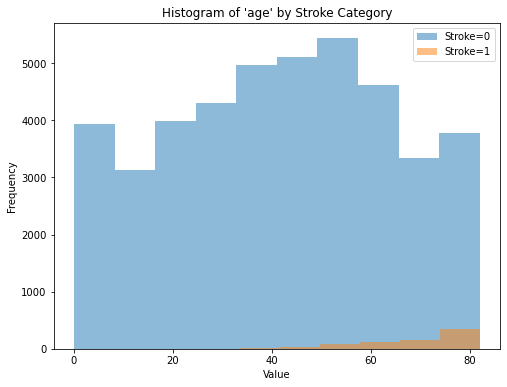

In [235]:
plot_histogram_dv(df['age'], y)

Observations:
1. Higher the age, higher the possibility of getting stroke
2. People <30 yrs are extremely less susceptible to stroke
3. Age - very good candidate for binning

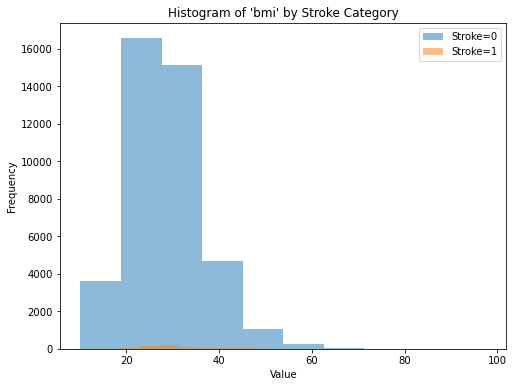

In [236]:
plot_histogram_dv(df['bmi'], y)

Observations:
1. Probability of stroke is high for BMI between 15 to 56
2. Good candidate for binning - underweight (0-18.5), healthy(18.5-25), overweight(25-30), obese(30+)
3. Based on these bmi categories, underweight people are not susceptible to stroke 

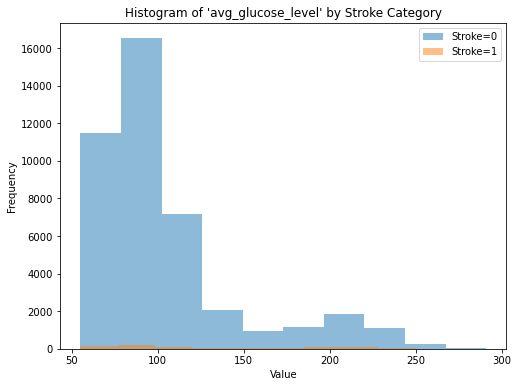

In [237]:
plot_histogram_dv(df['avg_glucose_level'], y)

Observations:
1. Good candidate for binning - Normal (0-140), Prediabetic(140-200), Diabetic(200+)
2. Based on these glucose values, stroke is not linearly related to diabetes.
3. Percentage of people getting stroke
   Normal      - 1.18%
   Prediabetic - 0.24%
   Diabetic    - 0.39%

In [238]:
# Impute the missing values
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

# Get the mode for smoking_status
df['smoking_status'].fillna(value=df['smoking_status'].mode()[0], inplace=True)

In [239]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [240]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [241]:
# Create the 3 new categories for age, bmi & avg_glucose_level
bins = [0,10,30,50,70,100]
names = ['child', 'young_adult', 'adult', 'senior', 'super_senior']
df['age_group'] = pd.cut(df['age'], bins, labels=names)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,child
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,senior
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,child
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,senior
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,young_adult


In [242]:
bins = [0,18.5,25,30,100]
names = ['under_weight', 'healthy', 'over_weight', 'obese']
df['bmi_status'] = pd.cut(df['bmi'], bins, labels=names)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_status
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,child,under_weight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,senior,obese
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,child,under_weight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,senior,obese
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,young_adult,healthy


In [243]:
bins = [0,140,200,400]
names = ['normal', 'prediabetic', 'diabetic']
df['diabetic'] = pd.cut(df['avg_glucose_level'], bins, labels=names)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_status,diabetic
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,child,under_weight,normal
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,senior,obese,normal
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,child,under_weight,normal
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,senior,obese,normal
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,young_adult,healthy,prediabetic


In [252]:
lb = LabelEncoder()
df['age_group'] = lb.fit_transform(df['age_group'])
df['bmi_status'] = lb.fit_transform(df['bmi_status'])
df['diabetic'] = lb.fit_transform(df['diabetic'])

In [253]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_status,diabetic
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1,3,1
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,2,1,1
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,1,3,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,2,1,1
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,4,0,2


In [256]:
# Onehot encode - smoking_status, work_type
df = df.join(pd.get_dummies(df['gender'],drop_first=True))
df = df.join(pd.get_dummies(df['ever_married'],drop_first=True))
df = df.join(pd.get_dummies(df['Residence_type'],drop_first=True))
df = df.drop(['gender','ever_married', 'Residence_type'], axis=1)

df = df.join(pd.get_dummies(df['smoking_status'],drop_first=True))
df = df.join(pd.get_dummies(df['work_type'],drop_first=True))
df = df.drop(['smoking_status','work_type'], axis=1)

In [257]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_group,bmi_status,diabetic,Male,Other,Yes,Urban,never smoked,smokes,Never_worked,Private,Self-employed,children
0,30669,3.0,0,0,95.12,18.0,0,1,3,1,1,0,0,0,1,0,0,0,0,1
1,30468,58.0,1,0,87.96,39.2,0,2,1,1,1,0,1,1,1,0,0,1,0,0
2,16523,8.0,0,0,110.89,17.6,0,1,3,1,0,0,0,1,1,0,0,1,0,0
3,56543,70.0,0,0,69.04,35.9,0,2,1,1,0,0,1,0,0,0,0,1,0,0
4,46136,14.0,0,0,161.28,19.1,0,4,0,2,1,0,0,0,1,0,1,0,0,0


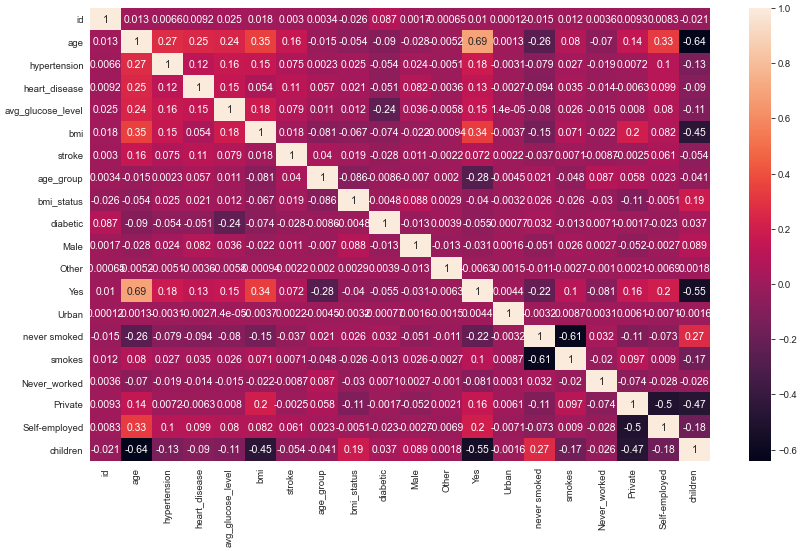

In [260]:
plt.figure(figsize=(20,12), dpi=50)
sns.heatmap(df.corr(), annot = True);

In [286]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] =['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
                   'bmi', 'stroke', 'Male', 'Other', 'Yes', 'Urban', 'never smoked',
                   'smokes', 'Never_worked', 'Private', 'Self-employed', 'children']
vif

,VIF,Features
0,1.001130,age
1,2.548764,hypertension
2,1.100919,heart_disease
3,1.099552,avg_glucose_level
4,1.098332,bmi
5,1.226674,stroke
6,1.037115,Male
7,1.018109,Other
8,1.000630,Yes
9,1.991995,Urban


In [287]:
import scipy.stats as stat
import pylab

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(16,6))
    plt.subplot(1,3,1)
#     df[feature].hist()
    sns.kdeplot(df[feature], shade=True)
    plt.subplot(1,3,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.subplot(1,3,3)
    sns.boxplot(df[feature])
    plt.show()

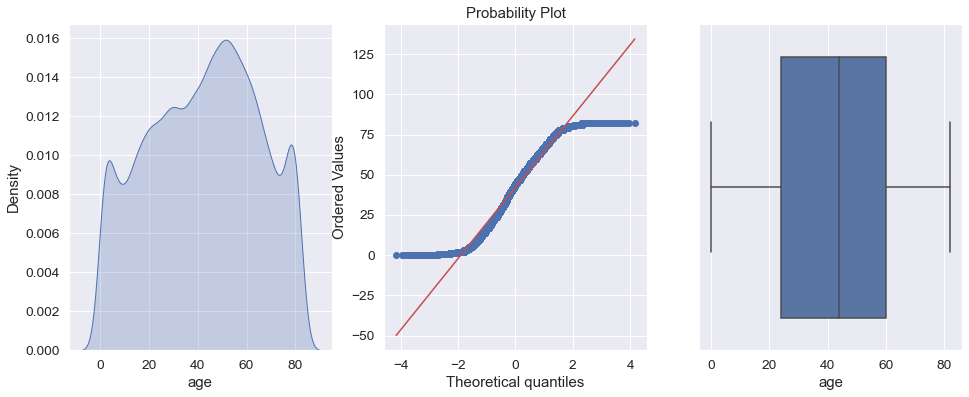

In [288]:
plot_data(df,'age')

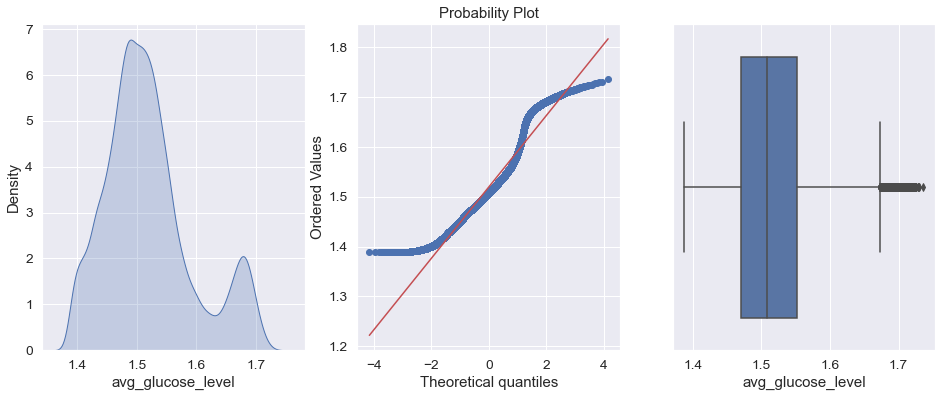

In [289]:
# df['avg_glucose_level'] = np.log(df['avg_glucose_level'])
# df['avg_glucose_level'] = df['avg_glucose_level']**(1/1.2)
# df['avg_glucose_level'] = df['avg_glucose_level']**(1/2)
# df['avg_glucose_level'] = 1/df['avg_glucose_level']
plot_data(df,'avg_glucose_level')

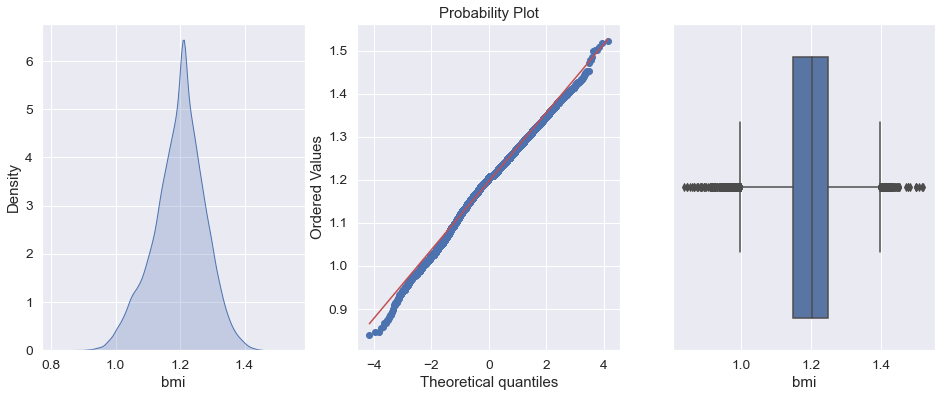

In [290]:
plot_data(df,'bmi')

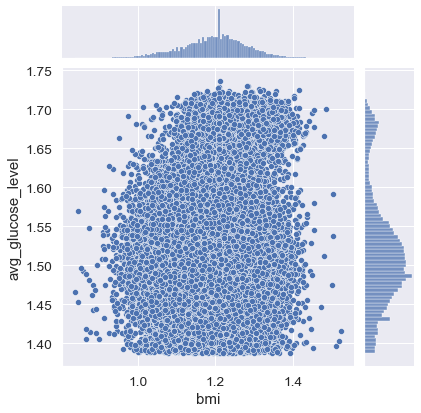

In [292]:
sns.jointplot(x=df['bmi'],y=df['avg_glucose_level'])

In [13]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

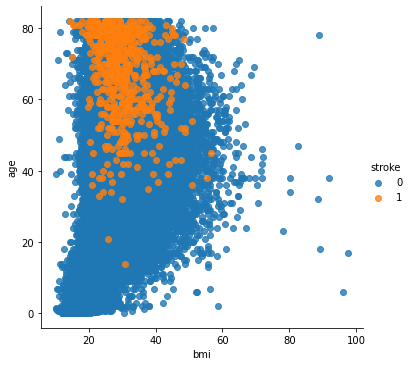

In [18]:
sns.lmplot(x='bmi', y='age', data=df, fit_reg = False, #Deleting regression line
hue='stroke')
# plt.xlim(50,70)

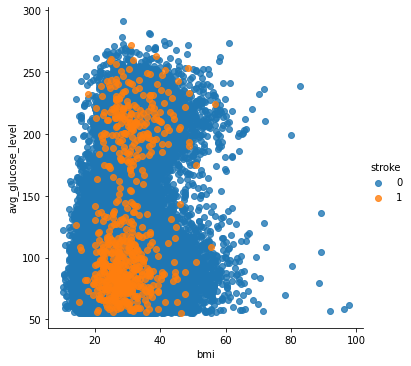

In [17]:
sns.lmplot(x='bmi', y='avg_glucose_level', data=df, fit_reg = False, #Deleting regression line
hue='stroke')
# plt.xlim(50,70)

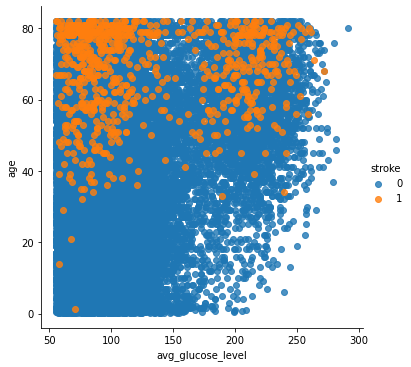

In [19]:
sns.lmplot(x='avg_glucose_level', y='age', data=df, fit_reg = False, #Deleting regression line
hue='stroke')
# plt.xlim(50,70)